In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
print(chipotle_data.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [3]:
chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
chipotle_data.describe() #show statistics

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [5]:
unique_items= chipotle_data.groupby("item_name")["quantity"].sum()
most_ordered_quantity= unique_items.max()
most_ordered_item= unique_items.idxmax()
print(most_ordered_item, most_ordered_quantity)

Chicken Bowl 761


In [6]:
## Total Revenue
processed_prices = chipotle_data["item_price"].str.replace('$', '').astype(float)
total_revenue = processed_prices.sum()
print(total_revenue)

34500.16


In [7]:
chipotle_data["order_id"].nunique()

1834

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


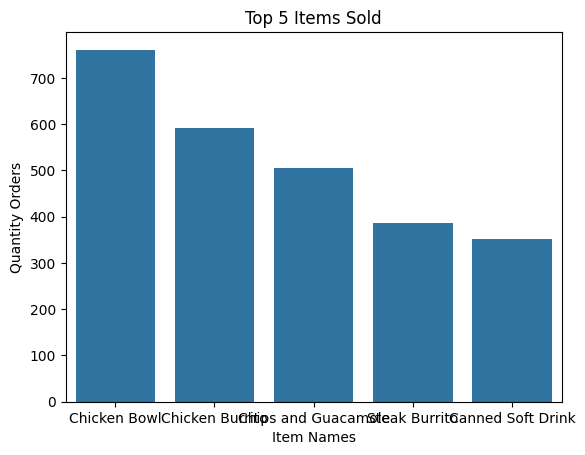

In [8]:
top_five_items = unique_items.nlargest(5) #top 5 items sold
print(top_five_items)

seaborn.barplot(x=top_five_items.index, y=top_five_items.values)
plt.xlabel("Item Names")
plt.ylabel("Quantity Orders")
plt.title("Top 5 Items Sold")
plt.show()

In [32]:
#How many items cost more than $10?
processed_prices[processed_prices>10].shape[0]


1130

In [19]:
#List the name of all unique items in the dataset.
chipotle_data["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64


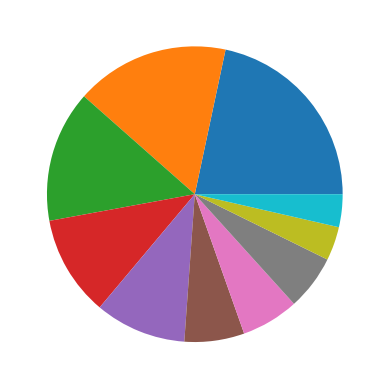

In [20]:
#Create a pie chart showing the number of times each of the top 10 items were ordered.
unique_items= chipotle_data.groupby("item_name")["quantity"].sum()
top_ten_items = unique_items.nlargest(10) #top 10 items sold
print(top_ten_items)



plt.pie(top_ten_items)
plt.show()

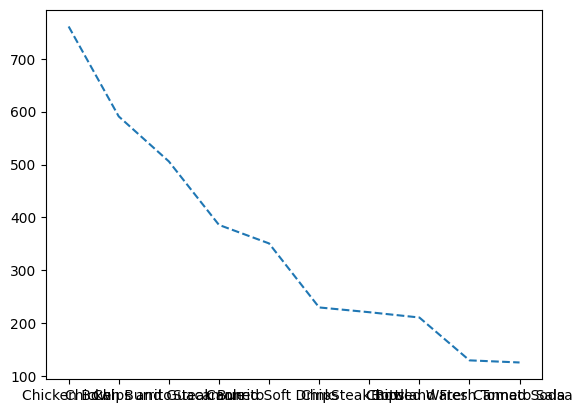

In [21]:
#Create a line graph showing how much money was spent on the top 10 items ordered.

top_ten_graph=plt.plot(top_ten_items, linestyle = 'dashed')


plt.show()